In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
323,ham,That would be great. We'll be at the Guild. Co...,NaN,NaN,NaN
1241,ham,"I want to show you the world, princess :) how ...",NaN,NaN,NaN
1039,ham,They just talking thats it de. They wont any o...,NaN,NaN,NaN
628,spam,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...,NaN,NaN,NaN
2224,ham,"I prefer my free days... Tues, wed, fri oso ca...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
df.sample(5)

,v1,v2
5394,ham,I dont know exactly could you ask chechi.
3130,spam,LookAtMe!: Thanks for your purchase of a video...
33,ham,For fear of fainting with the of all that hous...
5474,ham,Where's mummy's boy ? Is he being good or bad ...
4425,ham,Was it something u ate?


In [12]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4800,ham,The guy at the car shop who was flirting with ...
485,ham,If we win its really no 1 side for long time.
2744,ham,"Tick, tick, tick ... Babe"
832,spam,"Dear Voucher Holder, To claim this weeks offer..."
481,ham,"Yo carlos, a few friends are already asking me..."


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicate values
df.duplicated().sum()

403

In [18]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

2.EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

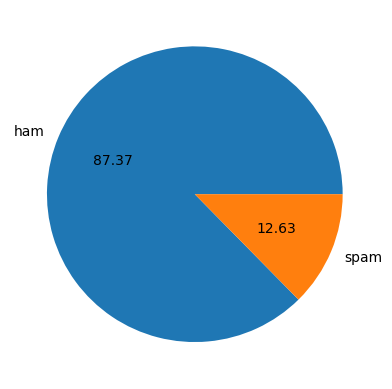

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
# Data is imbalanced

In [36]:
import spacy

In [37]:
nlp = spacy.load("en_core_web_sm")

In [38]:
# Tokenize and count words
df['num_words'] = df['text'].apply(lambda x: len([token.text for token in nlp(x)]))

In [41]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [42]:
df['num_sentences'] = df['text'].apply(lambda x: len(list(nlp(x).sents)))

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [44]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.339911,2.100987
std,58.236293,13.175170,1.456628
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,196.000000,27.000000


In [45]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.919176,1.961913
std,56.358207,13.224373,1.400953
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,27.000000


In [46]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,28.165391,3.062787
std,30.137753,7.361204,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,224.000000,49.000000,9.000000


In [47]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

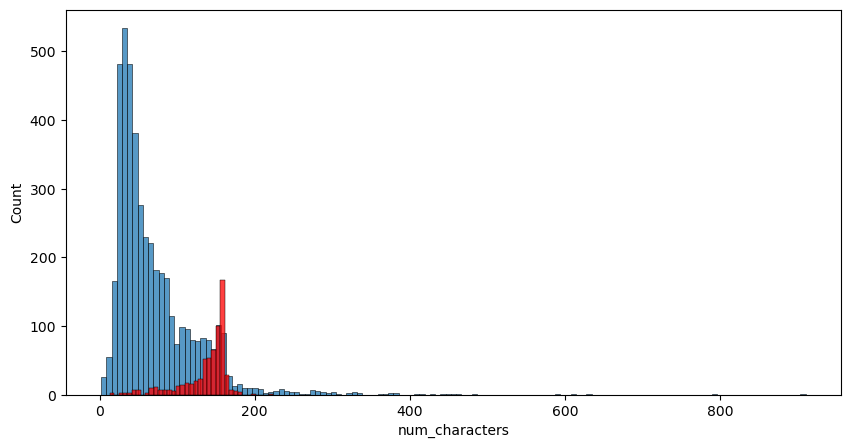

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

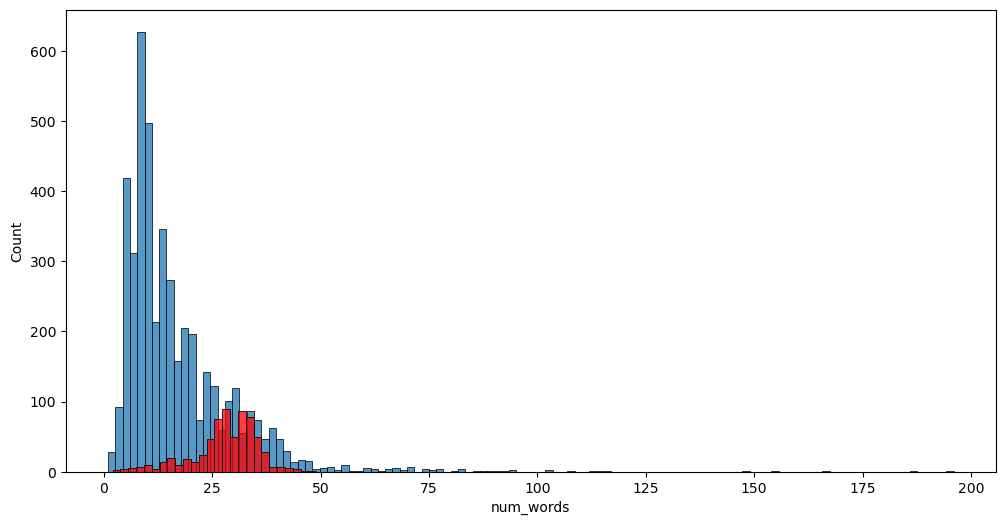

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

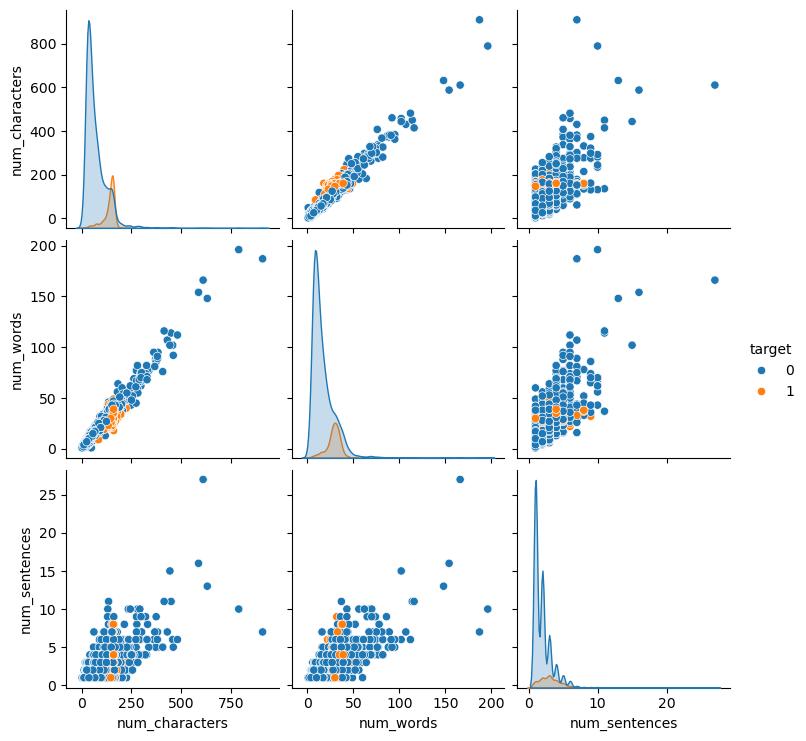

In [50]:
sns.pairplot(df,hue='target')

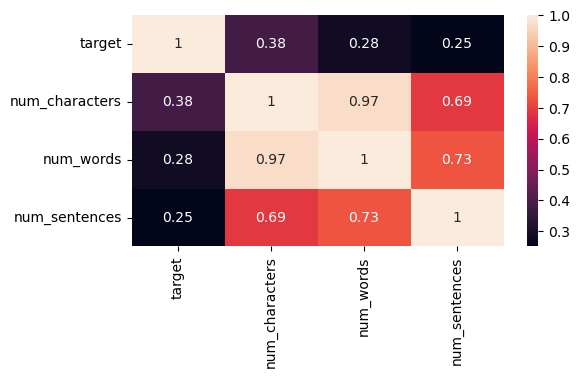

In [54]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Generate the heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

3. Data Preprocessing
    i. Lower case
    ii. Tokenization
    iii. Removing special characters
    iv. Removing stop words and punctuation
    v. Stemming

In [61]:
def transform_text(text):
    text = text.lower()
    
    # Tokenization using spaCy
    doc = nlp(text)
    
    # Removing non-alphanumeric tokens
    tokens = [token.text for token in doc if token.is_alpha]

    # Removing stopwords
    tokens = [token for token in tokens if not nlp.vocab[token].is_stop]
    
    # Lemmatization (Alternative to Stemming)
    tokens = [token.lemma_ for token in nlp(" ".join(tokens))]
    
    return " ".join(tokens)

In [62]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'go to home soon want talk stuff anymore tonight k cry today'

In [63]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [64]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [65]:
df['transformed_text'] = df['text'].apply(transform_text)

In [66]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entry wkly comp win fa cup final tkts tex...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life


In [67]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [68]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

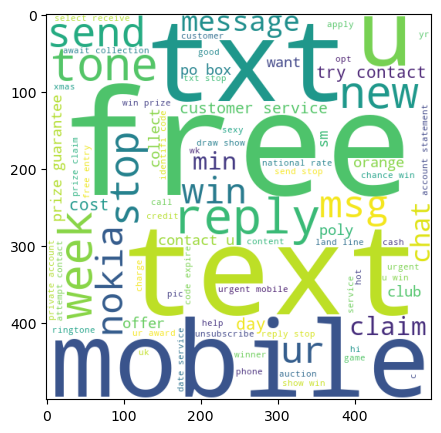

In [69]:
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)

In [70]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

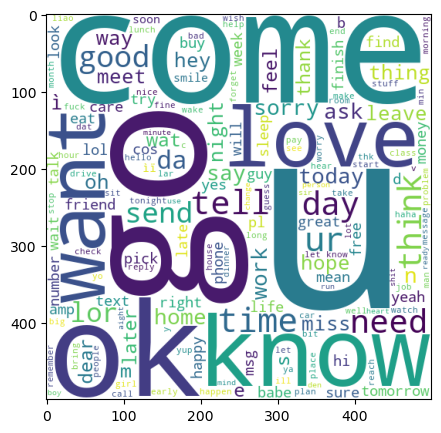

In [72]:
plt.figure(figsize=(10,5))
plt.imshow(ham_wc)

In [73]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entry wkly comp win fa cup final tkts tex...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life


In [74]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [75]:
len(spam_corpus)

7584

C:\Users\HP\AppData\Local\Temp\ipykernel_18876\2878312645.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="word", y="count", data=word_freq, palette="viridis")  # Use named arguments


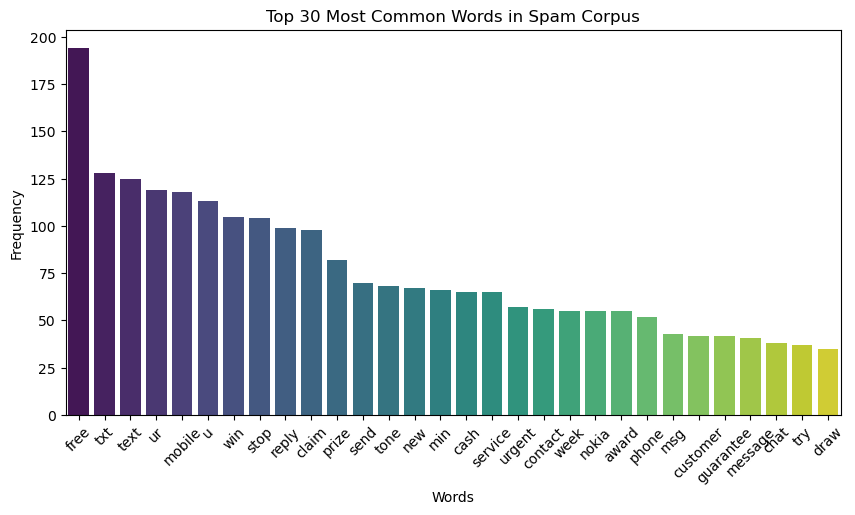

In [79]:
from collections import Counter
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

plt.figure(figsize=(10, 5))  # Adjust figure size for better readability
sns.barplot(x="word", y="count", data=word_freq, palette="viridis")  # Use named arguments

plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()

In [80]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [81]:
len(ham_corpus)

29882

C:\Users\HP\AppData\Local\Temp\ipykernel_18876\1875242106.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="word", y="count", data=word_freq, palette="viridis")  # Use named arguments


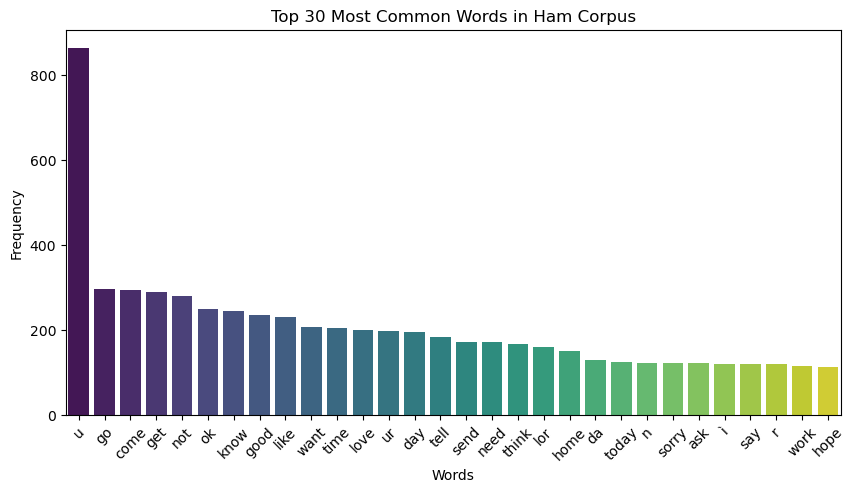

In [83]:
from collections import Counter

word_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

plt.figure(figsize=(10, 5))  
sns.barplot(x="word", y="count", data=word_freq, palette="viridis")  # Use named arguments

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Ham Corpus")
plt.show()

In [84]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entry wkly comp win fa cup final tkts tex...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life


4. Model Building

In [85]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [86]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [87]:
X.shape

(5169, 3000)

In [88]:
y = df['target'].values

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [93]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8288201160541586
[[744 152]
 [ 25 113]]
0.42641509433962266


In [94]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[895   1]
 [ 32 106]]
0.9906542056074766


In [95]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[893   3]
 [ 20 118]]
0.9752066115702479


In [97]:
# tfidf --> MNB

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [158]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2, n_jobs=-1)

In [100]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [101]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [102]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9709864603481625, 0.95)

In [103]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9709864603481625
Precision -  0.95
For  KN
Accuracy -  0.9119922630560928
Precision -  1.0
For  NB
Accuracy -  0.9680851063829787
Precision -  0.9906542056074766
For  DT
Accuracy -  0.9245647969052224
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9535783365570599
Precision -  0.9411764705882353
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9734513274336283


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.873015873015873
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  GBDT
Accuracy -  0.9429400386847195
Precision -  0.9540229885057471
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9572649572649573


In [104]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [105]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.911992,1.000000
2,NB,0.968085,0.990654
5,RF,0.970019,0.973451
8,ETC,0.974855,0.966667
10,xgb,0.970019,0.957265
9,GBDT,0.942940,0.954023
0,SVC,0.970986,0.950000
6,AdaBoost,0.967118,0.948276
4,LR,0.953578,0.941176
7,BgC,0.957447,0.873016


In [106]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [107]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.911992
1,NB,Accuracy,0.968085
2,RF,Accuracy,0.970019
3,ETC,Accuracy,0.974855
4,xgb,Accuracy,0.970019
5,GBDT,Accuracy,0.942940
6,SVC,Accuracy,0.970986
7,AdaBoost,Accuracy,0.967118
8,LR,Accuracy,0.953578
9,BgC,Accuracy,0.957447


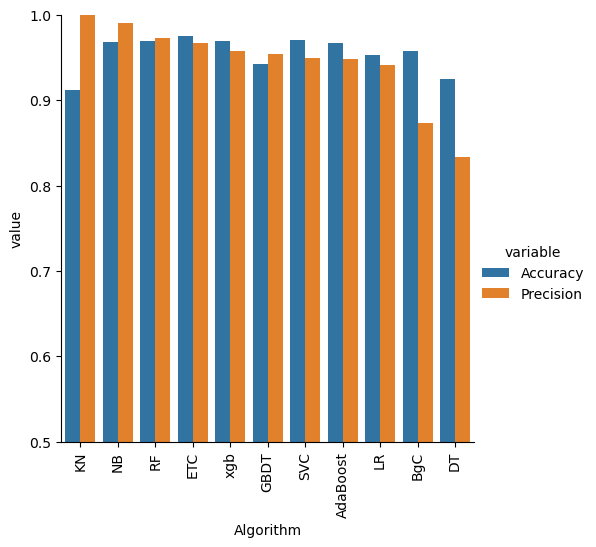

In [108]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [109]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [110]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [111]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [112]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [113]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [114]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [115]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.911992,1.000000,0.911992,1.000000,0.911992,1.000000,0.911992,1.000000
1,NB,0.968085,0.990654,0.968085,0.990654,0.968085,0.990654,0.968085,0.990654
2,RF,0.970019,0.973451,0.970019,0.973451,0.970019,0.973451,0.970019,0.973451
3,ETC,0.974855,0.966667,0.974855,0.966667,0.974855,0.966667,0.974855,0.966667
4,xgb,0.970019,0.957265,0.970019,0.957265,0.970019,0.957265,0.970019,0.957265
5,GBDT,0.942940,0.954023,0.942940,0.954023,0.942940,0.954023,0.942940,0.954023
6,SVC,0.970986,0.950000,0.970986,0.950000,0.970986,0.950000,0.970986,0.950000
7,AdaBoost,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
8,LR,0.953578,0.941176,0.953578,0.941176,0.953578,0.941176,0.953578,0.941176
9,BgC,0.957447,0.873016,0.957447,0.873016,0.957447,0.873016,0.957447,0.873016


In [120]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [118]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [119]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [156]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred, zero_division=1))

Accuracy 0.97678916827853
Precision 0.9830508474576272


In [150]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [151]:
from sklearn.ensemble import StackingClassifier

In [152]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [157]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred, zero_division=1))

Accuracy 0.9758220502901354
Precision 0.9448818897637795


In [159]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))